# Trabalho  de Física Computacional
Aluno: Wagner Martins de Lima Filho

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Modelo SIR

### O modelo SIR é descrito pelo sistema de EDO's abaixo:
$$
\begin{equation}
\frac{dS}{dt}=\beta SI \quad
\end{equation}
\\
\begin{equation}
\frac{dI}{dt}=\beta SI - \gamma I \quad
\end{equation}
\\
\begin{equation}
\frac{dR}{dt}=\gamma I \quad
\end{equation}
\\
$$


$$\because\ \frac{d^2\theta}{dt^2}+\omega_0^2sen(\theta)=0 \therefore\ \frac{d^2\theta}{dt^2}=-\omega_0^2sen(\theta)$$
$$\therefore\ \begin{cases}
    \frac{d\theta}{dt}=\omega \\ \\
    \frac{d\omega}{dt}=-\omega_0^2sen(\theta) \\
\end{cases}$$

Obs:
* $\theta$: Ângulo
* $\omega_0$: Amplitude
* $\omega$: Velocidade angular $\left(\frac{d\theta}{dt}\right)$

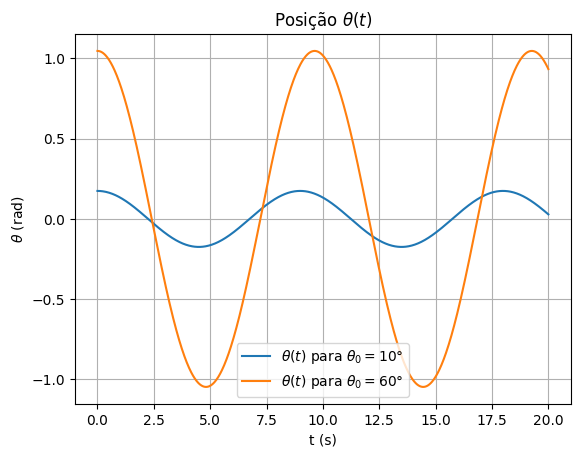

In [142]:
def metRK4(f, r0, ti, tf, n):
    r=r0
    h = (ti+tf)/n
    xpoints = []
    ypoints = []
    tpoints = np.arange(ti,tf+h,h)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2, t+h/2)
        k3 = h*f(r+k2/2, t+h/2)
        k4 = h*f(r+k3, t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
    return xpoints, ypoints, tpoints

def f(r,t):
    omega = 0.7

    theta,dtheta = r
    ftheta = dtheta
    dtheta = -(omega**2)*np.sin(theta)
    return np.array([ftheta,dtheta])

theta01 = np.deg2rad(10)
theta02 = np.deg2rad(60)
v0 = 0.

r01 = np.array([theta01,v0])
x1, y1, t1 = metRK4(f, r01, 0, 20, 1000)

plt.plot(t1, x1)

r02 = np.array([theta02,v0])
x2, y2, t2 = metRK4(f, r02, 0, 20, 1000)

plt.plot(t2, x2)
plt.title(r'Posição $\theta(t)$')
plt.xlabel(r't (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.legend([r'$\theta(t)$ para $\theta_0=10\degree$',r'$\theta(t)$ para $\theta_0=60\degree$'])
plt.grid()
plt.show()

### b) A energia total do pêndulo, que é conservada nesse sistema, pode ser escrita como:
$$E=\frac{1}{2}mL^2\left(\frac{d\theta}{dt}\right)^2+mgL(1-cos(\theta))$$
onde $L=\frac{g}{\omega^2}$, $g$ é a aceleração da gravidade e $m=1kg$. Para o caso $\theta_0=60\degree$, faça o gráfico de $E$ em função do tempo. O que se pode concluir do resultado?

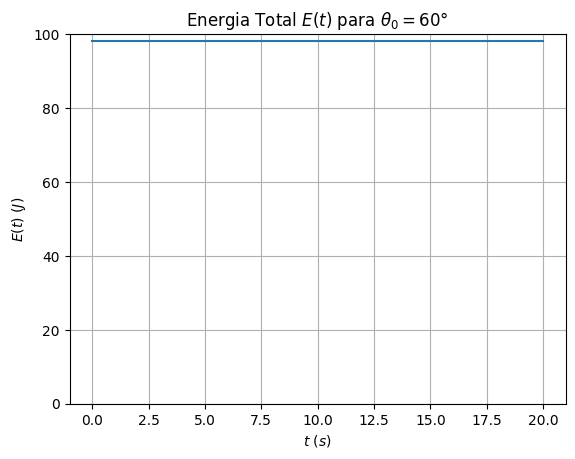

In [143]:
def energia(theta, dtheta):
    omega = 0.7
    g = 9.81
    L = g/(np.power(omega,2))
    m = 1
    return 0.5*m*(L**2)*(np.power(dtheta,2))+m*g*L*(1-np.cos(theta))

# Basicamente, a energia é calculada tomando os vetores theta e dtheta (x2,y2: x2 para theta partindo de theta inicial 60°, y2 para dtheta partindo de theta inicial 60°) calculados no item anterior. Daí pode-se inferir o restante da equação.
E2 = energia(x2,y2)

plt.plot(t2,E2)
plt.title(r"Energia Total $E(t)$ para $\theta_0=60\degree$")
plt.xlabel(r"$t\ (s)$")
plt.ylabel(r"$E(t)\ (J)$")
plt.yticks(range(0,120,20))
plt.grid()
plt.show()

Conclusão: Como a amplitude se mantém durante todo o movimento, pois não há forças externas ao sistema, visto no item (a), pode-se inferir que a energia será constante, o quê é comprovado quando olhamos o gráfico na escala correta